<h1 style="text-align: center;">Desafío - Dimensionalidad y Agrupación I</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Dimensionalidad y agrupación (I)`, disponible en la plataforma.

## Contexto
- Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality Item Pool, aplicados a 2800 individuos. 
- El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características de:
    - Amabilidad
    - Escrupulosidad
    - Extroversión
    - Neuroticismo
    - Apertura
    
- Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
    - `1`: No me representa para nada.
    - `2`: No me representa.
    - `3`: Algunas cosas no me representan.
    - `4`: Algunas cosas me representan.
    - `5`: Me representa.
    - `6`: Me representa completamente.
    
- Las 25 preguntas son:
    - `A1`: Soy indiferente a los sentimientos de otros.
    - `A2`: Me preocupo del bienestar de otros.
    - `A3`: Sé cómo confortar a otros.
    - `A4`: Me agradan los niños.
    - `A5`: Hago sentir tranquila a la gente.
    - `C1`: Soy exacto en mi trabajo.
    - `C2`: Sigo con mis tareas hasta que todo esté perfecto.
    - `C3`: Hago cosas siguiendo un plan.
    - `C4`: Hago cosas con el mínimo esfuerzo.
    - `C5`: Pierdo mi tiempo.
    - `E1`: No hablo mucho con las personas.
    - `E2`: Me es difícil acercarme a otros.
    - `E3`: Sé cómo cautivar a la gente.
    - `E4`: Hago amigos de forma fácil.
    - `E5`: Puedo tomar el cargo de las cosas.N1 Me enojo con facilidad.
    - `N2`: Me irrito con facilidad.
    - `N3`: Tengo cambios de humor frecuentes.
    - `N4`: Usualmente me siento melancólico.
    - `N5`: Entró en pánico con facilidad.
    - `O1`: Estoy lleno de ideas.
    - `O2`: Evito leer material difícil.
    - `O3`: Tiendo a llevar la conversación a niveles más altos.
    - `O4`: Dedico tiempo a la reflexión de cosas.
    - `O5`: No profundizaré sobre una materia específica.
    
- Se registraron una serie de covariables sobre características demográficas de los encuestados:
    - `gender`: Masculino = 1, Femenino = 2.
    - `education`: 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa, 5 = Estudios de Postgrado.
    - `age`: Edad en Años.
    
- Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Desafío 1: Lectura de archivos
- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
- Solicite las primeras 5 observaciones con `head`.

In [5]:
# En caso de que no se tenga los módulos instalados, ejecutar esta celda como celda de código
!pip install factor_analyzer
!pip install missingno

In [7]:
# Utiliza esta celda para importar los módulos requeridos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import factor_analyzer as fact
import missingno as msgno 

df = pd.read_csv("bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
- Elimine las columnas redundantes de la base, tal como `Unnamed: 0`.


In [8]:
# Utiliza esta celda para eliminar Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

- Analice el patrón de datos perdidos con `missingno`.

<AxesSubplot:>

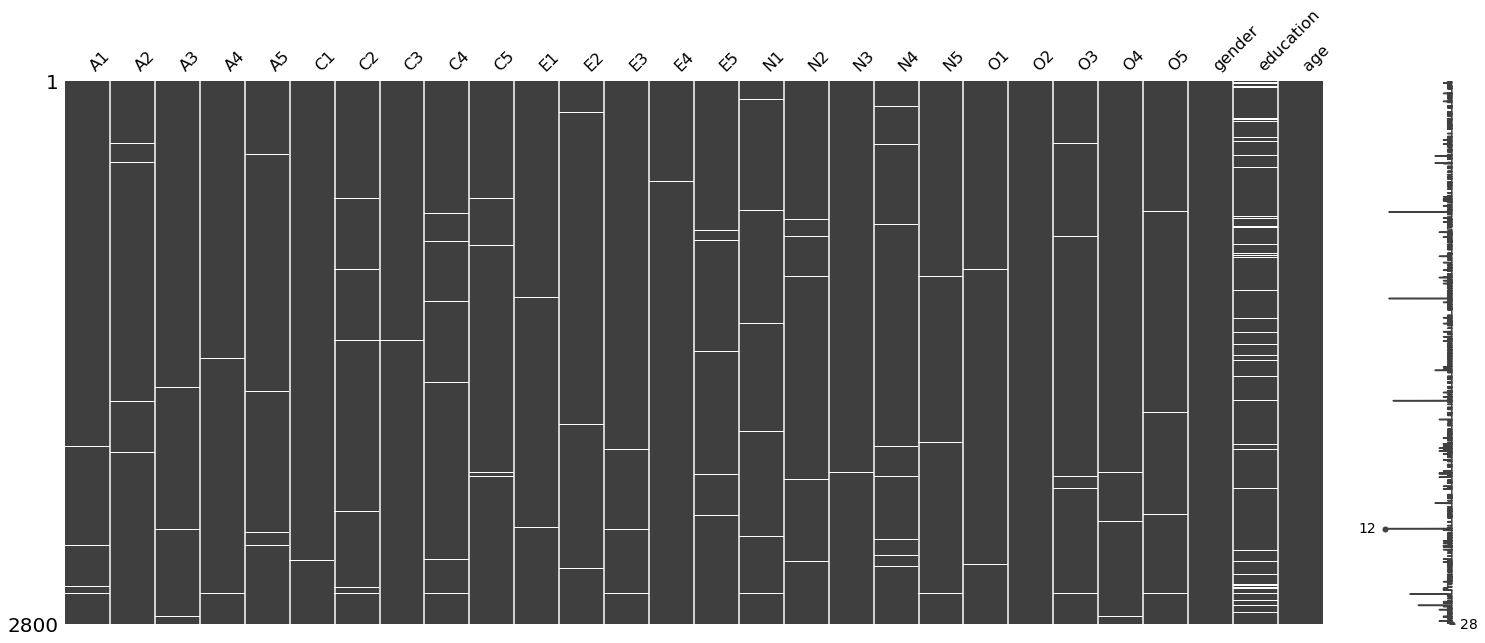

In [9]:
# Utiliza esta celda para explorar los datos perdidos
msgno.matrix(df)

- Comente cuáles son las principales variables con mayores tasas de valores perdidos.

**Respuesta:** La columna education es la que tiene más datos perdidos. Las demás están más o menos igual respecto a este aspecto.

- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

<AxesSubplot:>

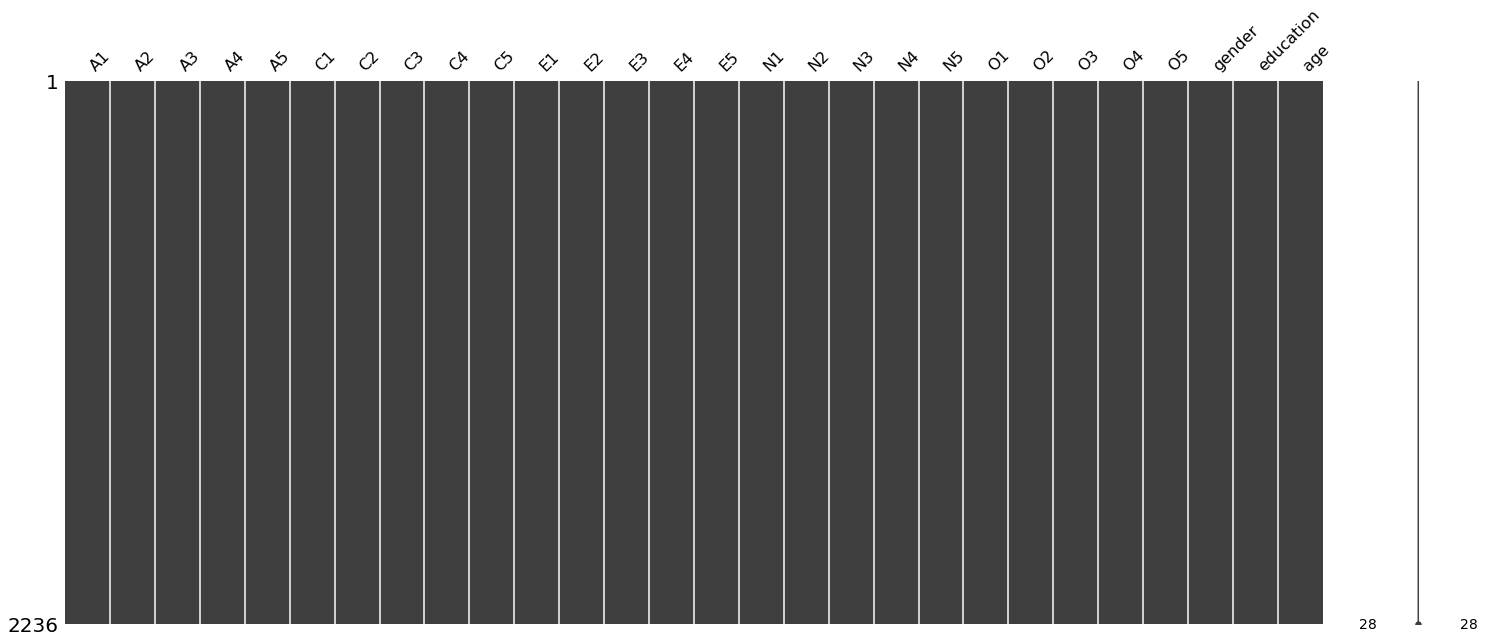

In [12]:
# Utiliza esta celda para almacenar el set sin datos perdidos.
df = df.dropna()
msgno.matrix(df)

## Desafío 3: Descripción
- Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.

In [15]:
# Utiliza esta celda para generar el subset a partir del set sin datos perdidos. Tip: Puedes usar slice de la forma A1:O5
df_questions = df.loc[:, 'A1' :'O5']
df_questions.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,2.0,1.0,6.0,5.0,6.0,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,6.0,4.0,2.0,1.0,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,3.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.

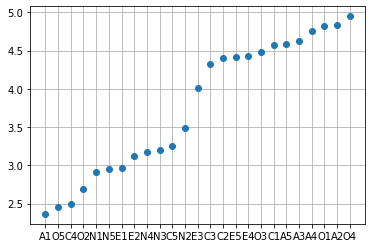

In [17]:
# Utiliza esta celda para generar el plot solicitado. Tip: Puedes aplicar mean() al df completo y ordenar sus valores
plt.plot(df_questions.mean().sort_values(), 'o')
plt.grid()

- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.

<AxesSubplot:>

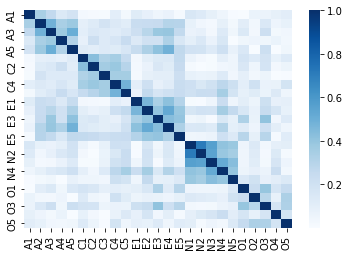

In [19]:
# Utiliza esta celda para generar el heatmap solicitado
sns.heatmap(df_questions.corr().abs(), cmap='Blues')

- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

**Respuesta**

## Desafío 4: Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin.

In [20]:
# Utiliza esta celda para realizar la prueba de esferacidad de Barlett
estadistico, pvalue = fact.calculate_bartlett_sphericity(df_questions)
assert pvalue < 0.05

In [21]:
# Utiliza esta celda para realizar la prueba KMO
kmos_individuales, kmo_general = fact.calculate_kmo(df_questions)
assert kmo_general > 0.7

**Comentarios**

- Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

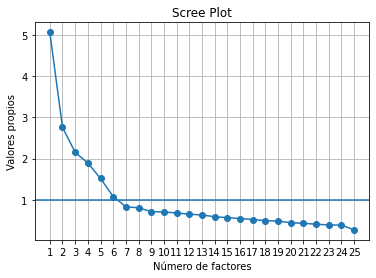

In [24]:
# Utiliza esta celda para generar los factores latentes y graficar sus valores propios
factores  = fact.FactorAnalyzer(n_factors=10, rotation=None).fit(df_questions)

# Extraer los valores propios

factor_screeplot = factores.get_eigenvalues()[0]

# Graficamos eigenvalues contra cantidad de estimables

plt.plot(
    range(1,len(factor_screeplot) + 1), # eje x
    factor_screeplot, # eje y
    'o-'
)

plt.xlabel('Número de factores')
plt.ylabel('Valores propios')
plt.xticks(range(1,len(factor_screeplot) + 1)) # para que grafique todos los valores del eje x
plt.axhline(1) # Criterio de corte
plt.title('Scree Plot')
plt.grid()



- Refactoriza el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas $\lambda$ del modelo e identifique qué ítems están asociados a cada factor.

In [34]:
# Utiliza esta celda para generar los nuevos factores, extraer sus cargas, y mostrarlas en un dataframe con escala de colores
factorize_6 = fact.FactorAnalyzer(n_factors=6, rotation=None).fit(df_questions)
cargas = pd.DataFrame(
    factorize_6.loadings_,
    columns=[f'Factor {i}' for i in range (1,7)],
    index = df_questions.columns
    )

cargas[cargas > .4].fillna(0).round(3).style.format("{:.2f}").background_gradient(cmap='Purples').applymap(lambda x: 'color: transparent' if x == 0 else '')

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.00,0.00,0.00,0.00,0.00,0.00
A2,0.46,0.00,0.00,0.00,0.00,0.00
A3,0.52,0.00,0.00,0.00,0.00,0.00
A4,0.00,0.00,0.00,0.00,0.00,0.00
A5,0.57,0.00,0.00,0.00,0.00,0.00
C1,0.00,0.00,0.44,0.00,0.00,0.00
C2,0.00,0.00,0.46,0.00,0.00,0.00
C3,0.00,0.00,0.00,0.00,0.00,0.00
C4,0.00,0.00,0.00,0.00,0.00,0.00
C5,0.00,0.00,0.00,0.00,0.00,0.00


**Comente sobre qué significa cada factor construído**

## Desafío 5: Modelación de factores
- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con `kdplot`.

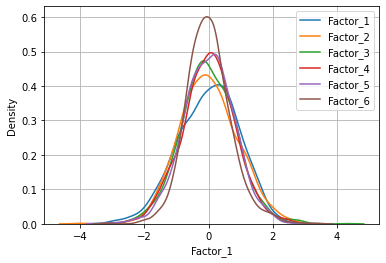

In [37]:
# Utiliza esta celda para extraer los puntajes y graficar su densidad
puntajes = pd.DataFrame(factorize_6.transform(df_questions), columns=[f'Factor_{i}' for i in range(1,7)])

for  c in puntajes.columns:
    sns.kdeplot(puntajes[c], label=c)

plt.legend()
plt.grid()

- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
$$
y_i = \beta_0 + \beta_{gender} \cdot \text{gender}_i + \beta_{education} \cdot \text{education}_i + \beta_{age} \cdot \text{age}_i + \epsilon_i
$$

- $y$: Factor a modelar.

In [39]:
# Utiliza esta celda para entrenar los modelos solicitados. Se debe hacer un modelo paara cada factor.
df_modelo = pd.concat([
    df[["gender", "education", "age"]].reset_index(drop=True),
    puntajes
], axis=1)

df_modelo["gender"] = df_modelo["gender"].replace([1, 2], [1, 0])

df_modelo.head()

,gender,education,age,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,0,3.0,21,1.104750,0.710607,0.777228,0.429006,-0.958366,0.076417
1,1,2.0,19,-2.177680,-0.753407,0.511305,-0.211500,-0.730752,-0.523280
2,1,1.0,21,-0.015513,-0.195295,-0.403276,0.044932,-0.422234,0.065485
3,1,1.0,17,-0.273800,-0.804856,0.925969,0.354409,-1.354209,0.213480
4,1,5.0,68,0.262650,-0.660616,-1.395966,-1.336868,0.644094,-0.395139


In [43]:
# Utiliza esta celda para mostrar los determinantes significativos del primer modelo
modelo_factor_1 = smf.ols("Factor_1 ~ gender + education + age", data=df_modelo).fit()

modelo_factor_1.summary2().tables[1]["P>|t|"] < 0.05

Intercept     True
gender        True
education    False
age           True
Name: P>|t|, dtype: bool

In [44]:
modelo_factor_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.304146,0.075301,-4.039098,5.547045e-05,-0.451813,-0.156480
gender,-0.181987,0.042285,-4.303863,1.750930e-05,-0.264909,-0.099066
education,0.013771,0.018433,0.747100,4.550822e-01,-0.022376,0.049919
age,0.010844,0.001924,5.637460,1.943944e-08,0.007072,0.014617


In [12]:
# Utiliza esta celda para mostrar los determinantes significativos del segundo modelo
modelo_factor_2 = smf.ols("Factor_2 ~ gender + education + age", data=df_modelo).fit()

modelo_factor_2.summary2().tables[1]["P>|t|"] < 0.05

In [13]:
# Utiliza esta celda para mostrar los determinantes significativos del tercer modelo

In [14]:
# Utiliza esta celda para mostrar los determinantes significativos del cuarto modelo

**Comentarios**